# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

https://www.kaggle.com/jboysen/injured-workers

Escolhi esta base de dados porque contém dados de acidentes do trabalho, área em que tenho familiaridade pois poussuo uma empresa de presetação de serviços (www.erplan.com.br) que tem como principal produto um software de gestão de Saúde, Segurança do Trabalho, Meio Ambiente e Qualidade.

Apesar dos dados desta base refletirem uma realidade distante da brasileira, quero investigar justamente as características da base de dados, que conta com um volume razoável de informações brutas (26 colunas x 22.000 linhas), com acidentes graves de trabalho - amputação, fraturas, queimaduras etc.) entre 1/1/2015 e 28/2/2017 em 4.643 cidades dos Estados Unidos nos 54 estados dos Estados Unidos.

In [1]:
# Bibliotecas
import matplotlib.pyplot as plt # visualização de dados
import numpy as np # linear algebra
import pandas as pd # data processing
from geopy.geocoders import Nominatim as geo # geoprocessamento
import geopandas # Plotagem no mapa
import descartes # Necessário para usar o Geopandas
from shapely.geometry import Point, Polygon # Para desenhar o mapa dos EUA
from collections import Counter
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv("database/severeinjury.csv", 
     engine='python')


df.head(5)

ID     UPA EventDate  \
0  2015010015  931176  1/1/2015   
1  2015010016  930267  1/1/2015   
2  2015010018  929823  1/1/2015   
3  2015010019  929711  1/1/2015   
4  2015010020  929642  1/1/2015   

                                         Employer               Address1  \
0  FCI Otisville Federal Correctional Institution         Two Mile Drive   
1                      Kalahari Manufacturing LLC     171 Progress Drive   
2                 Schneider National Bulk Carrier    420 CORAOPOLIS ROAD   
3                       PEPSI BOTTLING GROUP INC.      4541 HOUSTON AVE.   
4                 North American Pipe Corporation  210 South Arch Street   

  Address2         City         State      Zip  Latitude  ...  Nature  \
0      NaN    OTISVILLE      NEW YORK  10963.0     41.46  ...     111   
1      NaN  LAKE DELTON     WISCONSIN  53940.0     43.59  ...    1522   
2      NaN   CORAOPOLIS  PENNSYLVANIA  15108.0     40.49  ...      10   
3      NaN        MACON       GEORGIA  31206.0     32.77  ...    1972   
4      NaN   JANESVILLE     WISCONSIN  53545.0     42.67  ...     111   

                                     NatureTitle  Part of Body  \
0                                      Fractures           513   
1             Second degree heat (thermal) burns           519   
2  Traumatic injuries and disorders, unspecified          9999   
3       Soreness, pain, hurt-nonspecified injury           510   
4                                      Fractures          4429   

                 Part of Body Title  Event  \
0                      Lower leg(s)   1214   
1                    Leg(s), n.e.c.    317   
2                   Nonclassifiable   4331   
3               Leg(s), unspecified    640   
4  Finger(s), fingernail(s), n.e.c.   6411   

                                          EventTitle  Source  \
0  Injured by physical contact with person while ...    5721   
1              Ignition of vapors, gases, or liquids    7261   
2         Other fall to lower level less than 6 feet    8421   
3  Caught in or compressed by equipment or object...    8623   
4  Caught in running equipment or machinery durin...     350   

                                         SourceTitle  Secondary Source  \
0                                          Co-worker            5772.0   
1                 Welding, cutting, and blow torches               NaN   
2                Semi, tractor-trailer, tanker truck             741.0   
3                                Pallet jack-powered            8420.0   
4  Metal, woodworking, and special material machi...               NaN   

                              Secondary Source Title  
0                      Inmate or detainee in custody  
1                                                NaN  
2                                      Ladders-fixed  
3  Truck-motorized freight hauling and utility, u...  
4                                                NaN  

[5 rows x 26 columns]

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


In [3]:
df.columns

Index(['ID', 'UPA', 'EventDate', 'Employer', 'Address1', 'Address2', 'City',
       'State', 'Zip', 'Latitude', 'Longitude', 'Primary NAICS',
       'Hospitalized', 'Amputation', 'Inspection', 'Final Narrative', 'Nature',
       'NatureTitle', 'Part of Body', 'Part of Body Title', 'Event',
       'EventTitle', 'Source', 'SourceTitle', 'Secondary Source',
       'Secondary Source Title'],
      dtype='object')

*Descrição da base e suas variáveis*

É um banco com dados de acidentes graves de trabalho, com detalhamento da gravidade do acidente, parte do corpo atingida, natureza da lesão e também informações demográficas, especialmente cidade e estado, permitindo comparações das features de gravidade dos acidentes em relação aos estados e cidades.



### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.




Consultando linhas e colunas

In [4]:
df.shape

(21578, 26)

A base contém 21.578 linhas e 26 colunas

Colunas: 
- (-) ID: Identificador chave PK da linha, irrelevante para estatística
- (-) UPA: Valor numérico não identificado
- (+) EventDate: Data do incidente/acidente
- (-) Employer: Nome da empresa contratatante
- (-) Address1: Endereço do empregado
- (-) Address2: Continuação do endereço
- (+) City: Cidade
- (+) State: Estado
- (-) Zip: CEP
- (+) Latitude
- (+) Longitude
- (-) Primay NAICS (Numérico não identificado)
- (+) Hospitalized (Binário)
- (+) Amputation (Binário)
- (-) Inspection (Numérico) - Código
- (-) Final Narrative (Descrição)
- (-) Nature (Código da Natureza)
- (+) Nature Title
- (-) Part of Body (Código da parte do corpo)
- (+) Part of Body Title
- (-) Event (Código do evento)
- (+) Event Title
- (-) Source (Código da Fonte)
- (+) Source title
- (-) Secondary Source (Código da fonte secundária)
- (+) Secondary Source Title

Das 26 colunas, 12 serão utilizadas (+), sendo as últimas 10 são informações repetidas (código/descrição).
As colunas marcadas com (-) não serão utilizadas na análise.
Há necessidades de colunas adicionais auxiliares como quebrar EventDate em Dia, mês e ano e dia da semana.

Dropando as colunas desnecessárias, exceto Endereço, por enquanto

Verificarndo que não há muitos dados únicos relevantes de empregadores, desprezando também


In [5]:
df['Employer'].describe()


count                   21578
unique                  18004
top       U.S. Postal Service
freq                      129
Name: Employer, dtype: object

In [6]:
df=df.drop(['ID', 'UPA', 'Employer', 'Zip','Primary NAICS','Inspection', 'Final Narrative','Source','Part of Body','Nature','Event','Secondary Source'],axis = 1)

Mostrando as colunas resultantes

In [7]:
df.columns

Index(['EventDate', 'Address1', 'Address2', 'City', 'State', 'Latitude',
       'Longitude', 'Hospitalized', 'Amputation', 'NatureTitle',
       'Part of Body Title', 'EventTitle', 'SourceTitle',
       'Secondary Source Title'],
      dtype='object')

Mostrando os tipos existentes

In [8]:
df.dtypes

EventDate                  object
Address1                   object
Address2                   object
City                       object
State                      object
Latitude                  float64
Longitude                 float64
Hospitalized              float64
Amputation                float64
NatureTitle                object
Part of Body Title         object
EventTitle                 object
SourceTitle                object
Secondary Source Title     object
dtype: object

Informações importantes sobre o dataframe para Insights

In [9]:
df.describe()

Latitude     Longitude  Hospitalized    Amputation
count  21487.000000  21487.000000  21578.000000  21576.000000
mean      36.722735    -87.691200      0.807999      0.269837
std        5.500293     11.132113      0.412055      0.451033
min      -15.780000   -170.710000      0.000000      0.000000
25%       32.200000    -95.400000      1.000000      0.000000
50%       38.770000    -87.660000      1.000000      0.000000
75%       41.090000    -80.625000      1.000000      1.000000
max       61.290000    145.750000      3.000000      9.000000

Analisando individualmente algumas colunas

In [10]:
df["City"].describe()

count       21569
unique       4642
top       HOUSTON
freq          403
Name: City, dtype: object

In [11]:
df["Part of Body Title"].describe()

count                                21578
unique                                 118
top       Finger(s), fingernail(s), n.e.c.
freq                                  2790
Name: Part of Body Title, dtype: object

Valores únicos de Origem do Acidente

In [12]:
len (df["SourceTitle"].unique())

903

Encontradas 903 fontes diferentes na base 

Verificando se há valores nulos em algum lugar que possam ser substituídos

Gerando um novo dataframe só com os valores nulos

In [13]:
df1 = df[df.isna().any(axis=1)]
df1.head()

EventDate               Address1 Address2         City         State  \
0  1/1/2015         Two Mile Drive      NaN    OTISVILLE      NEW YORK   
1  1/1/2015     171 Progress Drive      NaN  LAKE DELTON     WISCONSIN   
2  1/1/2015    420 CORAOPOLIS ROAD      NaN   CORAOPOLIS  PENNSYLVANIA   
3  1/1/2015      4541 HOUSTON AVE.      NaN        MACON       GEORGIA   
4  1/1/2015  210 South Arch Street      NaN   JANESVILLE     WISCONSIN   

   Latitude  Longitude  Hospitalized  Amputation  \
0     41.46     -74.53           1.0         0.0   
1     43.59     -89.79           1.0         0.0   
2     40.49     -80.11           1.0         0.0   
3     32.77     -83.65           1.0         0.0   
4     42.67     -89.04           1.0         0.0   

                                     NatureTitle  \
0                                      Fractures   
1             Second degree heat (thermal) burns   
2  Traumatic injuries and disorders, unspecified   
3       Soreness, pain, hurt-nonspecified injury   
4                                      Fractures   

                 Part of Body Title  \
0                      Lower leg(s)   
1                    Leg(s), n.e.c.   
2                   Nonclassifiable   
3               Leg(s), unspecified   
4  Finger(s), fingernail(s), n.e.c.   

                                          EventTitle  \
0  Injured by physical contact with person while ...   
1              Ignition of vapors, gases, or liquids   
2         Other fall to lower level less than 6 feet   
3  Caught in or compressed by equipment or object...   
4  Caught in running equipment or machinery durin...   

                                         SourceTitle  \
0                                          Co-worker   
1                 Welding, cutting, and blow torches   
2                Semi, tractor-trailer, tanker truck   
3                                Pallet jack-powered   
4  Metal, woodworking, and special material machi...   

                              Secondary Source Title  
0                      Inmate or detainee in custody  
1                                                NaN  
2                                      Ladders-fixed  
3  Truck-motorized freight hauling and utility, u...  
4                                                NaN

Garbage collection

In [14]:
del df1

Identificado que a coluna Secondary Source tem muitos valores nulos, dropando as colunas equivalentes

In [15]:
df=df.drop(['Secondary Source Title'],axis=1)

df.head(10)

EventDate                                 Address1 Address2         City  \
0  1/1/2015                           Two Mile Drive      NaN    OTISVILLE   
1  1/1/2015                       171 Progress Drive      NaN  LAKE DELTON   
2  1/1/2015                      420 CORAOPOLIS ROAD      NaN   CORAOPOLIS   
3  1/1/2015                        4541 HOUSTON AVE.      NaN        MACON   
4  1/1/2015                    210 South Arch Street      NaN   JANESVILLE   
5  1/1/2015                3031 NE Pine Island Road       NaN   CAPE CORAL   
6  1/1/2015                          6505 Jewel Ave       NaN        TAMPA   
7  1/2/2015  Wells Ranch, 3314-225-228, Tank Battery      NaN         GILL   
8  1/2/2015                           38734 S CR 200      NaN     WOODWARD   
9  1/2/2015                 6201 West Colonial Drive      NaN      ORLANDO   

          State  Latitude  Longitude  Hospitalized  Amputation  \
0      NEW YORK     41.46     -74.53           1.0         0.0   
1     WISCONSIN     43.59     -89.79           1.0         0.0   
2  PENNSYLVANIA     40.49     -80.11           1.0         0.0   
3       GEORGIA     32.77     -83.65           1.0         0.0   
4     WISCONSIN     42.67     -89.04           1.0         0.0   
5       FLORIDA     26.68     -81.91           1.0         0.0   
6       FLORIDA     27.96     -82.38           0.0         1.0   
7      COLORADO     40.47    -104.51           1.0         0.0   
8      OKLAHOMA     36.42     -99.43           1.0         0.0   
9       FLORIDA     28.55     -81.46           0.0         1.0   

                                     NatureTitle  \
0                                      Fractures   
1             Second degree heat (thermal) burns   
2  Traumatic injuries and disorders, unspecified   
3       Soreness, pain, hurt-nonspecified injury   
4                                      Fractures   
5       Soreness, pain, hurt-nonspecified injury   
6                                    Amputations   
7              Heat (thermal) burns, unspecified   
8  Traumatic injuries and disorders, unspecified   
9                                    Amputations   

                 Part of Body Title  \
0                      Lower leg(s)   
1                    Leg(s), n.e.c.   
2                   Nonclassifiable   
3               Leg(s), unspecified   
4  Finger(s), fingernail(s), n.e.c.   
5                          Elbow(s)   
6                      Fingertip(s)   
7                   Nonclassifiable   
8                   Nonclassifiable   
9                      Fingertip(s)   

                                          EventTitle  \
0  Injured by physical contact with person while ...   
1              Ignition of vapors, gases, or liquids   
2         Other fall to lower level less than 6 feet   
3  Caught in or compressed by equipment or object...   
4  Caught in running equipment or machinery durin...   
5                Fall on same level due to slipping    
6  Caught in running equipment or machinery durin...   
7                                    Nonclassifiable   
8         Struck by object or equipment, unspecified   
9  Injured by slipping or swinging object held by...   

                                         SourceTitle  
0                                          Co-worker  
1                 Welding, cutting, and blow torches  
2                Semi, tractor-trailer, tanker truck  
3                                Pallet jack-powered  
4  Metal, woodworking, and special material machi...  
5     Floors, walkways, ground surfaces, unspecified  
6             Special process machinery, unspecified  
7                                    Nonclassifiable  
8                                 Tires, except bike  
9                      Knives, unspecified or n.e.c.

Checando novamente se há valores nulos 

In [16]:
df.isnull().values.any()
df.isnull().sum() 
 

EventDate                 0
Address1                 10
Address2              19717
City                      9
State                     0
Latitude                 91
Longitude                91
Hospitalized              0
Amputation                2
NatureTitle               0
Part of Body Title        0
EventTitle                0
SourceTitle               0
dtype: int64

In [17]:
round(df.isnull().mean() * 100,2)

EventDate              0.00
Address1               0.05
Address2              91.38
City                   0.04
State                  0.00
Latitude               0.42
Longitude              0.42
Hospitalized           0.00
Amputation             0.01
NatureTitle            0.00
Part of Body Title     0.00
EventTitle             0.00
SourceTitle            0.00
dtype: float64

Verificado que nas colunas City, Latitude, Longitude e Amputation há valores nulos, sendo que 91,38% dos valores de Address2 são nulos!

No caso de Amputation, é possível deduzir que caso seja nulo, posso assumir que seja 0 (binário)

In [18]:
df['Amputation'].fillna(0, inplace=True)
df['Amputation'] = df['Amputation'].apply(lambda x: 1 if x>0 else 0)
df['Hospitalized'] = df['Hospitalized'].apply(lambda x: 1 if x>0 else 0)

No caso de Latitude e Longitude, se a Cidade estiver preenchida, teoricamente é possível descobrir a latitude e longitude usando algum tipo de API

In [19]:
df1 = df[df['City'].isnull()]

df1.head(10)


EventDate                     Address1 Address2 City          State  \
538     1/21/2015             Daisy 2411 1-27H      NaN  NaN       OKLAHOMA   
5580    7/24/2015                          NaN      NaN  NaN  MASSACHUSETTS   
6050     8/7/2015  Clein Federal 5300-31-18-6B      NaN  NaN   NORTH DAKOTA   
6223    8/13/2015                          NaN      NaN  NaN          TEXAS   
7909   10/14/2015                          NaN      NaN  NaN        ARIZONA   
9205    12/3/2015                          NaN      NaN  NaN     CALIFORNIA   
9208    12/3/2015                          NaN      NaN  NaN  MASSACHUSETTS   
12925   4/28/2016                          NaN      NaN  NaN     NEW JERSEY   
21002    2/8/2017                          NaN      NaN  NaN       NEW YORK   

       Latitude  Longitude  Hospitalized  Amputation  \
538       36.75     -98.35             1           1   
5580      42.38     -71.08             1           1   
6050      47.81    -103.23             1           0   
6223      29.63     -95.17             1           0   
7909      33.39    -112.04             0           1   
9205      37.87    -122.24             1           0   
9208      42.56     -71.13             1           0   
12925      0.00       0.00             1           0   
21002     40.71     -74.00             1           0   

                                         NatureTitle  \
538                                      Amputations   
5580                                     Amputations   
6050   Traumatic injuries and disorders, unspecified   
6223               Effects of heat and light, n.e.c.   
7909                                     Amputations   
9205        Soreness, pain, hurt-nonspecified injury   
9208                                       Fractures   
12925                                      Fractures   
21002  Traumatic injuries and disorders, unspecified   

                                      Part of Body Title  \
538                                      Hand(s), n.e.c.   
5580                         Fingernail(s), nailbed(s)     
6050                                     Nonclassifiable   
6223                                        BODY SYSTEMS   
7909                                        Fingertip(s)   
9205                         Multiple body parts, n.e.c.   
9208   Chest, except internal location of diseases or...   
12925                                           Wrist(s)   
21002                                    Nonclassifiable   

                                              EventTitle  \
538    Struck by swinging or slipping object, other t...   
5580                                     Nonclassifiable   
6050          Struck by object or equipment, unspecified   
6223                      Exposure to environmental heat   
7909          Struck by swinging part of powered vehicle   
9205                 Fall on same level due to slipping    
9208       Struck by falling object or equipment, n.e.c.   
12925             Other fall to lower level, unspecified   
21002                Fall on same level due to slipping    

                                             SourceTitle  
538                      Oil drilling rigs and machinery  
5580                                     Nonclassifiable  
6050                                     Nonclassifiable  
6223                                  Heat-environmental  
7909                               Delivery truck or van  
9205                                       Floor, n.e.c.  
9208                                  Tables, worktables  
12925  Truck-motorized freight hauling and utility, u...  
21002     Floors, walkways, ground surfaces, unspecified

In [20]:
# Garbage collection
del df1

In [21]:
geolocator = geo(user_agent="Python")

for index, row in df.iterrows():
    if pd.isnull(row['City']):
        try:
            location = geolocator.reverse(str(row['Latitude'])+","+str(row['Longitude']))
            city = ""
           
            if 'city' in location.raw['address'].keys():
                city = location.raw['address']['city']
            if 'town' in location.raw['address'].keys():     
                city = location.raw['address']['town']  
           
            if city != "":
                print ("Localizada cidade ",city," a partir de Lat:",str(row['Latitude']),' Long:',str(row['Longitude']))
                df.at[index,'City']=city
        except:
            print ("Timeout em Lat: ",str(row['Latitude']),"  Long:",str(row['Longitude']))       
             
print ("Fim do processo.")   

Localizada cidade  Cherokee  a partir de Lat: 36.75  Long: -98.35
Localizada cidade  Somerville  a partir de Lat: 42.38  Long: -71.08
Localizada cidade  Watford City  a partir de Lat: 47.81  Long: -103.23
Localizada cidade  Pasadena  a partir de Lat: 29.63  Long: -95.17
Localizada cidade  Phoenix  a partir de Lat: 33.39  Long: -112.04
Localizada cidade  Berkeley  a partir de Lat: 37.87  Long: -122.24
Localizada cidade  North Reading  a partir de Lat: 42.56  Long: -71.13
Localizada cidade  New York  a partir de Lat: 40.71  Long: -74.0
Fim do processo.


Verificando o que ficou ainda de valores nulos em City

In [22]:
df1 = df[df['City'].isnull()]

df1.head(10)


    

EventDate Address1 Address2 City       State  Latitude  Longitude  \
12925  4/28/2016      NaN      NaN  NaN  NEW JERSEY       0.0        0.0   

       Hospitalized  Amputation NatureTitle Part of Body Title  \
12925             1           0   Fractures           Wrist(s)   

                                   EventTitle  \
12925  Other fall to lower level, unspecified   

                                             SourceTitle  
12925  Truck-motorized freight hauling and utility, u...

In [23]:
# Garbage collection
del df1

Só ficou uma cidade que não foi possível identificar, mas 8 registros puderam ser identificados

Há também registros com a Cidade e Estado, mas não há Latitude e Longitude, porém poderia ser possível descobrir estes dados faltantes usando a biblioteca.

In [24]:
for index, row in df.iterrows():
    if pd.isnull(row['Longitude']):
        address = str(row['Address1'])+", "+str(row['City'])+", "+str(row['State'])
        try:
            location = geolocator.geocode(address)
            if location != None:
                print ("Localizadas coordenadas ",str(location.latitude),", ",str(location.longitude)," a partir do endereço ",address)
                df.at[index,'Longitude']=location.longitude
                df.at[index,'Latitude']=location.latitude
        except:
            print ("Timeout em "+address)
            
print ("Fim do processo.")                        

Localizadas coordenadas  40.9686419714577 ,  -76.0166381926817  a partir do endereço  350 Jaycee Drive, HAZLETON, PENNSYLVANIA
Localizadas coordenadas  42.0907919 ,  -75.9124576  a partir do endereço  4400 Vestal Parkway East, BINGHAMTON, NEW YORK
Localizadas coordenadas  41.9779849 ,  -87.9093214128281  a partir do endereço  O'HARE INTERNATIONAL AIRPORT TERMINAL 5, CHICAGO, ILLINOIS
Localizadas coordenadas  28.4655198163896 ,  -81.474808118156  a partir do endereço  6808 Turkey Lake Road , ORLANDO, FLORIDA
Localizadas coordenadas  27.447431 ,  -80.3712258  a partir do endereço  25690 Orange Avenue, FORT PIERCE, FLORIDA
Localizadas coordenadas  29.7061434 ,  -95.3957772  a partir do endereço  6516 MD Anderson Blvd, HOUSTON, TEXAS
Localizadas coordenadas  26.8757845 ,  -80.1153316  a partir do endereço  4010 Faraday Way, PALM BEACH GARDENS, FLORIDA
Timeout em 110 Orchard Street, LORDS VALLEY, PENNSYLVANIA
Localizadas coordenadas  42.31018208 ,  -89.11345304  a partir do endereço  3625 H

Checando o que ficou de valores nulos

In [25]:
         
df.isnull().values.any()
df.isnull().sum() 

EventDate                 0
Address1                 10
Address2              19717
City                      1
State                     0
Latitude                 79
Longitude                79
Hospitalized              0
Amputation                0
NatureTitle               0
Part of Body Title        0
EventTitle                0
SourceTitle               0
dtype: int64

Verificado que foi possível complementar informações em 8 cidades e em 10 coordenadas de latitude e longitude.

Agora, eliminar as colunas de endereço, desnecessárias e também os valores nulos.

In [26]:
df=df.drop(['Address1','Address2'],axis=1)
df.dropna().reset_index(drop=True)


EventDate         City                 State  Latitude  Longitude  \
0       1/1/2015    OTISVILLE              NEW YORK     41.46     -74.53   
1       1/1/2015  LAKE DELTON             WISCONSIN     43.59     -89.79   
2       1/1/2015   CORAOPOLIS          PENNSYLVANIA     40.49     -80.11   
3       1/1/2015        MACON               GEORGIA     32.77     -83.65   
4       1/1/2015   JANESVILLE             WISCONSIN     42.67     -89.04   
...          ...          ...                   ...       ...        ...   
21493  2/28/2017   WASHINGTON  DISTRICT OF COLUMBIA     38.92     -76.99   
21494  2/28/2017       NEENAH             WISCONSIN     44.16     -88.47   
21495  2/28/2017      BRANSON              MISSOURI     36.61     -93.27   
21496  2/28/2017   WEST FARGO          NORTH DAKOTA     46.87     -96.93   
21497  2/28/2017   SPRINGDALE              ARKANSAS     36.17     -94.09   

       Hospitalized  Amputation  \
0                 1           0   
1                 1           0   
2                 1           0   
3                 1           0   
4                 1           0   
...             ...         ...   
21493             1           0   
21494             1           0   
21495             1           0   
21496             1           0   
21497             1           0   

                                           NatureTitle  \
0                                            Fractures   
1                   Second degree heat (thermal) burns   
2        Traumatic injuries and disorders, unspecified   
3             Soreness, pain, hurt-nonspecified injury   
4                                            Fractures   
...                                                ...   
21493                       Fractures and dislocations   
21494                                        Fractures   
21495                                        Fractures   
21496  Poisoning, including poisoning-related asphyxia   
21497                                        Fractures   

                          Part of Body Title  \
0                               Lower leg(s)   
1                             Leg(s), n.e.c.   
2                            Nonclassifiable   
3                        Leg(s), unspecified   
4           Finger(s), fingernail(s), n.e.c.   
...                                      ...   
21493  Finger(s), fingernail(s), unspecified   
21494            Multiple body parts, n.e.c.   
21495                           Lower leg(s)   
21496                           BODY SYSTEMS   
21497                    Leg(s), unspecified   

                                              EventTitle  \
0      Injured by physical contact with person while ...   
1                  Ignition of vapors, gases, or liquids   
2             Other fall to lower level less than 6 feet   
3      Caught in or compressed by equipment or object...   
4      Caught in running equipment or machinery durin...   
...                                                  ...   
21493  Fall through surface or existing opening, unsp...   
21494             Other fall to lower level 6 to 10 feet   
21495         Other fall to lower level less than 6 feet   
21496     Inhalation of harmful substance-single episode   
21497      Struck by falling object or equipment, n.e.c.   

                                             SourceTitle  
0                                              Co-worker  
1                     Welding, cutting, and blow torches  
2                    Semi, tractor-trailer, tanker truck  
3                                    Pallet jack-powered  
4      Metal, woodworking, and special material machi...  
...                                                  ...  
21493                     Scaffolds-staging, unspecified  
21494                  Porches, balconies, decks, patios  
21495                              Stairs, steps-indoors  
21496                                    Carbon monoxide  
21497                        

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

Melhorando o nome das colunas para melhor entendimento

In [27]:
df.columns = ['Data', 'Cidade', 'Estado', 'Latitude', 'Longitude', 'Hospitalizado', 'Amputacao', 'NaturezaLesao', 'ParteCorpo', 'Evento', 'Origem' ]
df.head(10)

Data       Cidade        Estado  Latitude  Longitude  Hospitalizado  \
0  1/1/2015    OTISVILLE      NEW YORK     41.46     -74.53              1   
1  1/1/2015  LAKE DELTON     WISCONSIN     43.59     -89.79              1   
2  1/1/2015   CORAOPOLIS  PENNSYLVANIA     40.49     -80.11              1   
3  1/1/2015        MACON       GEORGIA     32.77     -83.65              1   
4  1/1/2015   JANESVILLE     WISCONSIN     42.67     -89.04              1   
5  1/1/2015   CAPE CORAL       FLORIDA     26.68     -81.91              1   
6  1/1/2015        TAMPA       FLORIDA     27.96     -82.38              0   
7  1/2/2015         GILL      COLORADO     40.47    -104.51              1   
8  1/2/2015     WOODWARD      OKLAHOMA     36.42     -99.43              1   
9  1/2/2015      ORLANDO       FLORIDA     28.55     -81.46              0   

   Amputacao                                  NaturezaLesao  \
0          0                                      Fractures   
1          0             Second degree heat (thermal) burns   
2          0  Traumatic injuries and disorders, unspecified   
3          0       Soreness, pain, hurt-nonspecified injury   
4          0                                      Fractures   
5          0       Soreness, pain, hurt-nonspecified injury   
6          1                                    Amputations   
7          0              Heat (thermal) burns, unspecified   
8          0  Traumatic injuries and disorders, unspecified   
9          1                                    Amputations   

                         ParteCorpo  \
0                      Lower leg(s)   
1                    Leg(s), n.e.c.   
2                   Nonclassifiable   
3               Leg(s), unspecified   
4  Finger(s), fingernail(s), n.e.c.   
5                          Elbow(s)   
6                      Fingertip(s)   
7                   Nonclassifiable   
8                   Nonclassifiable   
9                      Fingertip(s)   

                                              Evento  \
0  Injured by physical contact with person while ...   
1              Ignition of vapors, gases, or liquids   
2         Other fall to lower level less than 6 feet   
3  Caught in or compressed by equipment or object...   
4  Caught in running equipment or machinery durin...   
5                Fall on same level due to slipping    
6  Caught in running equipment or machinery durin...   
7                                    Nonclassifiable   
8         Struck by object or equipment, unspecified   
9  Injured by slipping or swinging object held by...   

                                              Origem  
0                                          Co-worker  
1                 Welding, cutting, and blow torches  
2                Semi, tractor-trailer, tanker truck  
3                                Pallet jack-powered  
4  Metal, woodworking, and special material machi...  
5     Floors, walkways, ground surfaces, unspecified  
6             Special process machinery, unspecified  
7                                    Nonclassifiable  
8                                 Tires, except bike  
9                      Knives, unspecified or n.e.c.

Criando colunas adicionais para dia, mês e ano a partir de EventDate

In [28]:
df['ano'] = pd.DatetimeIndex(df['Data']).year
df['mes'] = pd.DatetimeIndex(df['Data']).month
df['dia'] = pd.DatetimeIndex(df['Data']).day
df['diaSemana'] = pd.DatetimeIndex(df['Data']).dayofweek

df.head(10)



Data       Cidade        Estado  Latitude  Longitude  Hospitalizado  \
0  1/1/2015    OTISVILLE      NEW YORK     41.46     -74.53              1   
1  1/1/2015  LAKE DELTON     WISCONSIN     43.59     -89.79              1   
2  1/1/2015   CORAOPOLIS  PENNSYLVANIA     40.49     -80.11              1   
3  1/1/2015        MACON       GEORGIA     32.77     -83.65              1   
4  1/1/2015   JANESVILLE     WISCONSIN     42.67     -89.04              1   
5  1/1/2015   CAPE CORAL       FLORIDA     26.68     -81.91              1   
6  1/1/2015        TAMPA       FLORIDA     27.96     -82.38              0   
7  1/2/2015         GILL      COLORADO     40.47    -104.51              1   
8  1/2/2015     WOODWARD      OKLAHOMA     36.42     -99.43              1   
9  1/2/2015      ORLANDO       FLORIDA     28.55     -81.46              0   

   Amputacao                                  NaturezaLesao  \
0          0                                      Fractures   
1          0             Second degree heat (thermal) burns   
2          0  Traumatic injuries and disorders, unspecified   
3          0       Soreness, pain, hurt-nonspecified injury   
4          0                                      Fractures   
5          0       Soreness, pain, hurt-nonspecified injury   
6          1                                    Amputations   
7          0              Heat (thermal) burns, unspecified   
8          0  Traumatic injuries and disorders, unspecified   
9          1                                    Amputations   

                         ParteCorpo  \
0                      Lower leg(s)   
1                    Leg(s), n.e.c.   
2                   Nonclassifiable   
3               Leg(s), unspecified   
4  Finger(s), fingernail(s), n.e.c.   
5                          Elbow(s)   
6                      Fingertip(s)   
7                   Nonclassifiable   
8                   Nonclassifiable   
9                      Fingertip(s)   

                                              Evento  \
0  Injured by physical contact with person while ...   
1              Ignition of vapors, gases, or liquids   
2         Other fall to lower level less than 6 feet   
3  Caught in or compressed by equipment or object...   
4  Caught in running equipment or machinery durin...   
5                Fall on same level due to slipping    
6  Caught in running equipment or machinery durin...   
7                                    Nonclassifiable   
8         Struck by object or equipment, unspecified   
9  Injured by slipping or swinging object held by...   

                                              Origem   ano  mes  dia  \
0                                          Co-worker  2015    1    1   
1                 Welding, cutting, and blow torches  2015    1    1   
2                Semi, tractor-trailer, tanker truck  2015    1    1   
3                                Pallet jack-powered  2015    1    1   
4  Metal, woodworking, and special material machi...  2015    1    1   
5     Floors, walkways, ground surfaces, unspecified  2015    1    1   
6             Special process machinery, unspecified  2015    1    1   
7                                    Nonclassifiable  2015    1    2   
8                                 Tires, except bike  2015    1    2   
9                      Knives, unspecified or n.e.c.  2015    1    2   

   diaSemana  
0          3  
1          3  
2          3  
3          3  
4          3  
5          3  
6          3  
7          4  
8          4  
9          4

Analisando a frequência de Hospitalizados


In [29]:
df["Hospitalizado"].value_counts(normalize=True)

1    0.800816
0    0.199184
Name: Hospitalizado, dtype: float64

Analisando a frequência de Amputados

In [30]:
df["Amputacao"].value_counts(normalize=True)

0    0.73181
1    0.26819
Name: Amputacao, dtype: float64

80% foram hospitalizados e 26,81% amputados

Tendo uma visão geral de número de acidentes, mas por cidade, usando geopandas

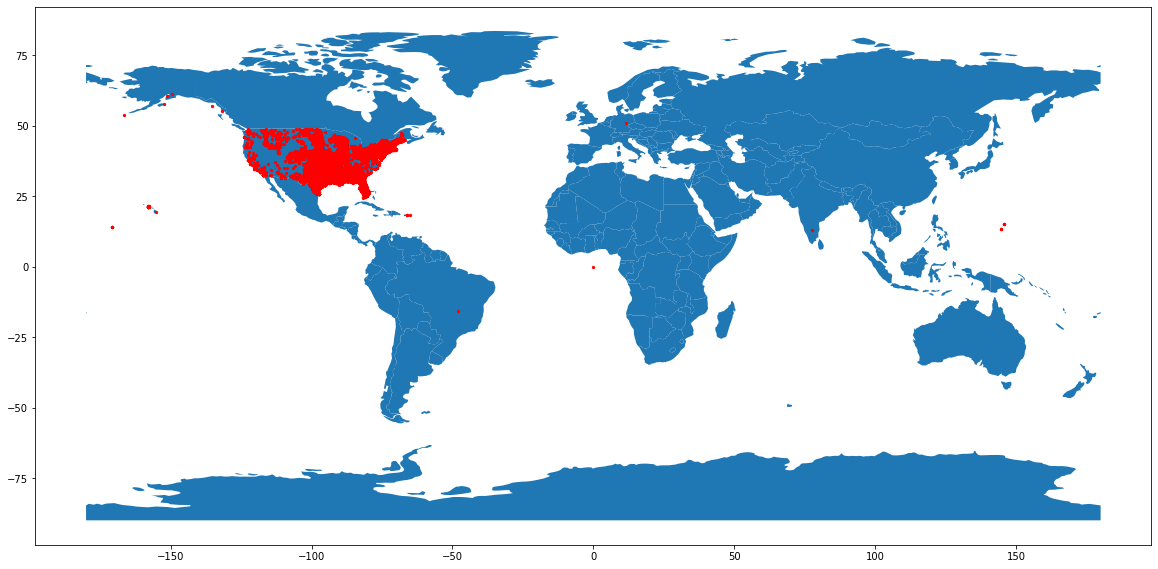

In [31]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = df.filter(['Longitude','Latitude'], axis=1)
cities = geopandas.GeoDataFrame(cities, geometry=geopandas.points_from_xy(cities.Longitude, cities.Latitude))


base = world.plot(figsize=(20, 20))
cities.plot(ax=base, marker='o', color='red', markersize=5)


Concentrando nos Estados Uniddos


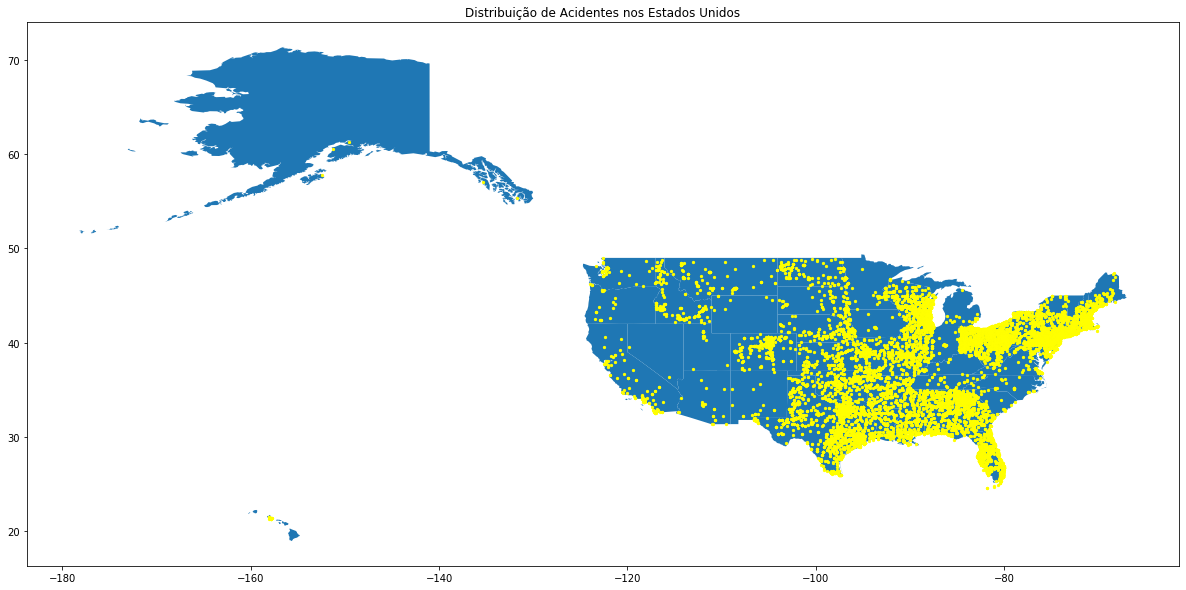

In [32]:


usa = geopandas.read_file('database/states.shp')

# concentrando cities só nas coordenadas dos EUA ( range: Latitude from 19.50139 to 64.85694 and longitude from -161.75583 to -68.01197.  )
cities = cities.query("(Latitude >= 19.50139 ) & (Latitude <=64.85694)")
cities = cities.query("(Longitude >= -161.75583 ) & (Longitude <= -68.01197)")

base = usa.plot(figsize=(30, 10))

plt.title("Distribuição de Acidentes nos Estados Unidos")

cities.plot(ax=base, marker='o', color='yellow', markersize=5)


Em uma análise visual rápida, pode-se dizer que as áreas mais industrializadas dos Estados Unidos concentram o maior número de acidentes

Verificando rapidamente número de acidentes por estado:

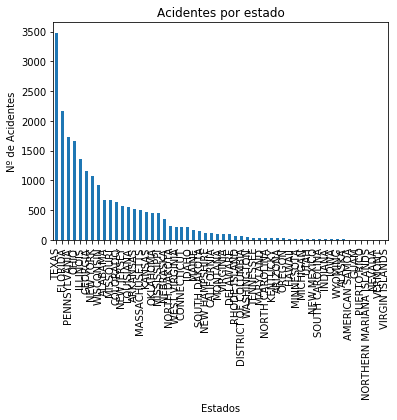

In [33]:

plt.ylabel("Nº de Acidentes")
plt.xlabel("Estados")
plt.title("Acidentes por estado")
plt.rcParams["figure.figsize"] = [16,9]

df['Estado'].value_counts().plot(kind="bar")

No estado que houveram mais acidentes (Texas), por cidade:


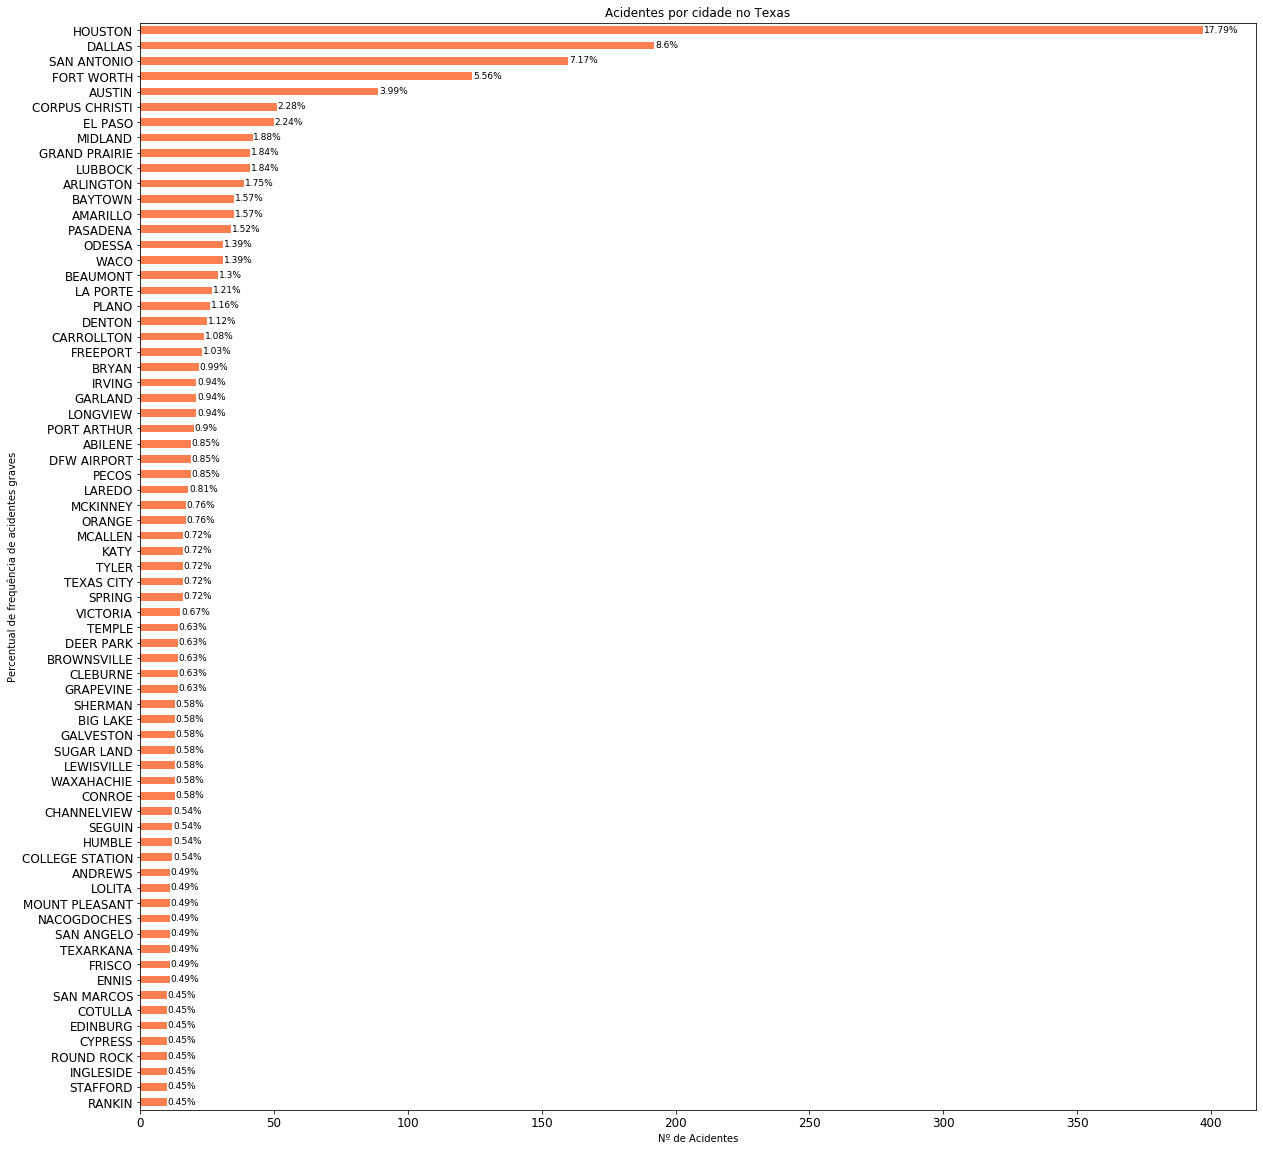

In [34]:
plt.title("Acidentes por cidade no Texas")
plt.ylabel("Percentual de frequência de acidentes graves")
plt.xlabel("Nº de Acidentes")

df1 =df.query("(Estado == 'TEXAS')")
# Filtrar as cidades que tiveram pelo menos 10 acidentes
ax = df1['Cidade'].value_counts()[df1['Cidade'].value_counts()>=10].plot(kind='barh', figsize=(20,20),
                                        color="coral", fontsize=12)
                                       
totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=9, color='black')

ax.invert_yaxis()

del df1 # Garbage collection

Acidentes por ano

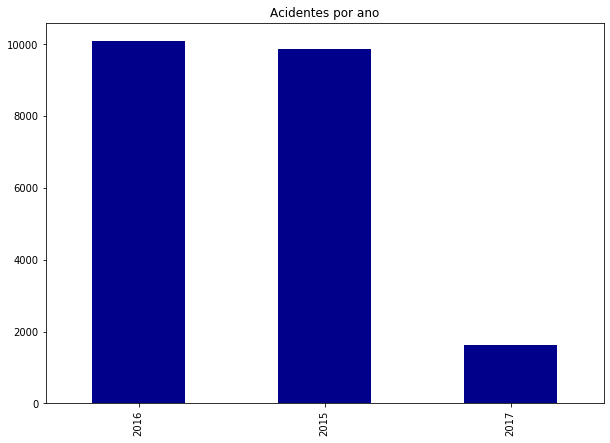

In [35]:
plt.title("Acidentes por ano")
ax = df['ano'].value_counts().plot(kind="bar", color="darkblue", figsize=(10,7))


Acidentes mais frequentes (por tipo de acidente) em 2016

Text(0, 0.5, 'Número de acidentes (20 ou mais vezes)')

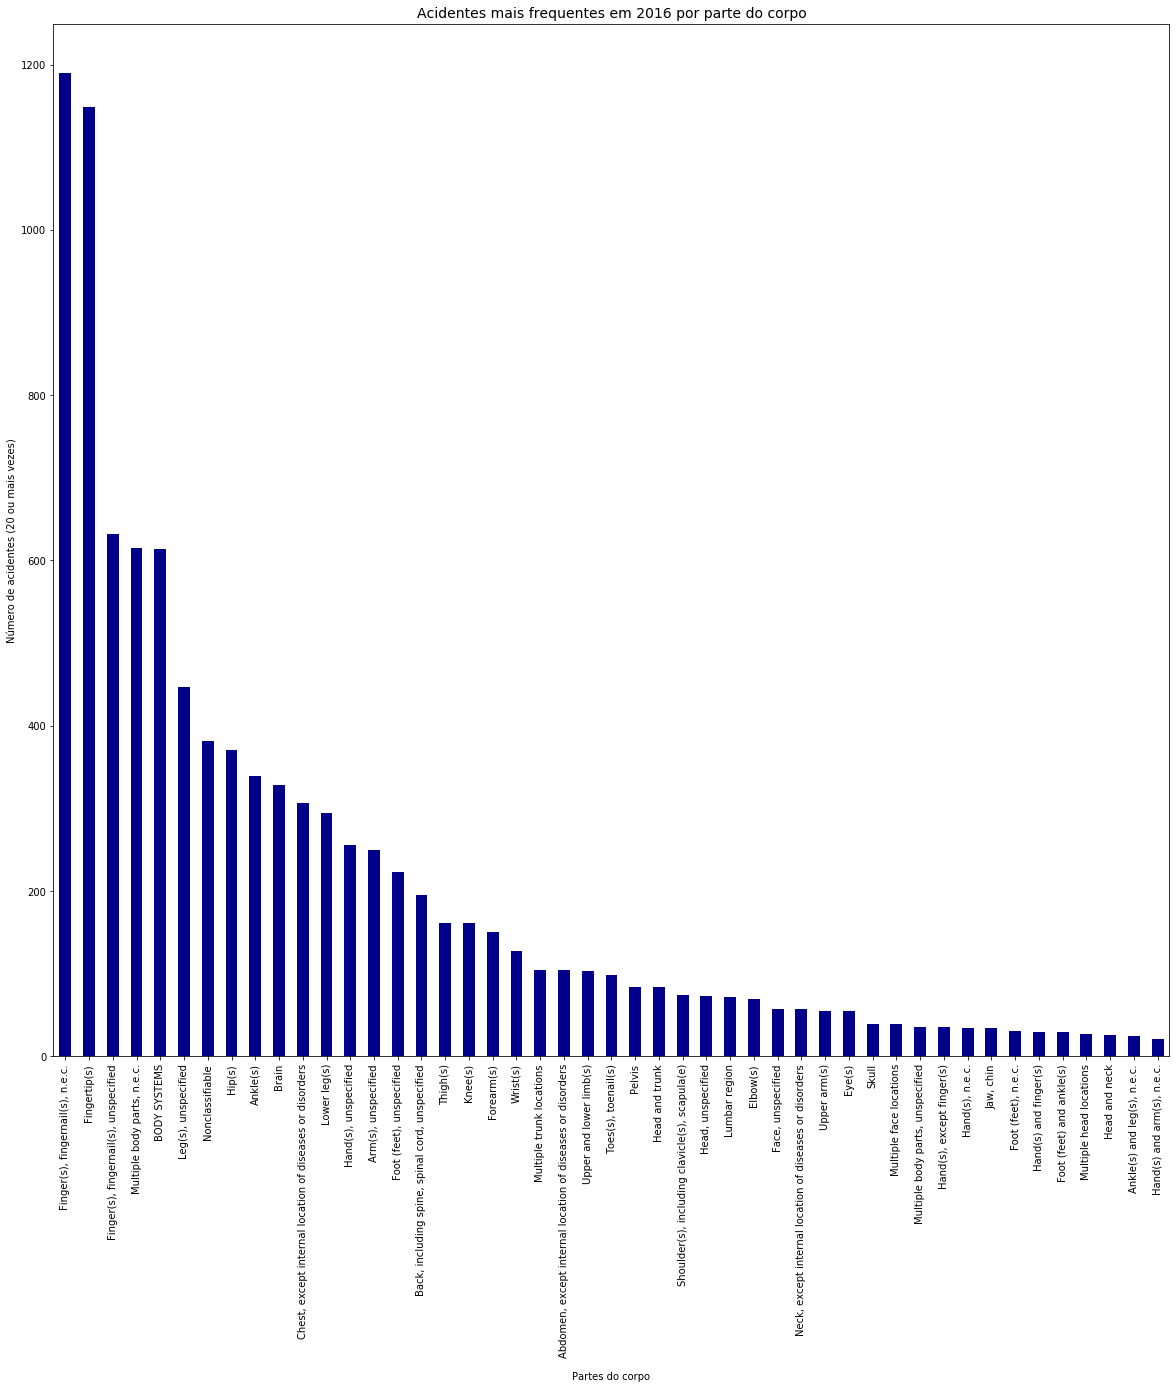

In [36]:
df1 =df.query("ano==2016")
ax=df1['ParteCorpo'].value_counts()[df1['ParteCorpo'].value_counts()>=20].plot(kind="bar", color="darkblue", figsize=(20,19))
plt.title("Acidentes mais frequentes em 2016 por parte do corpo", fontsize=14)
plt.xlabel("Partes do corpo", labelpad=14)
plt.ylabel("Número de acidentes (20 ou mais vezes)")





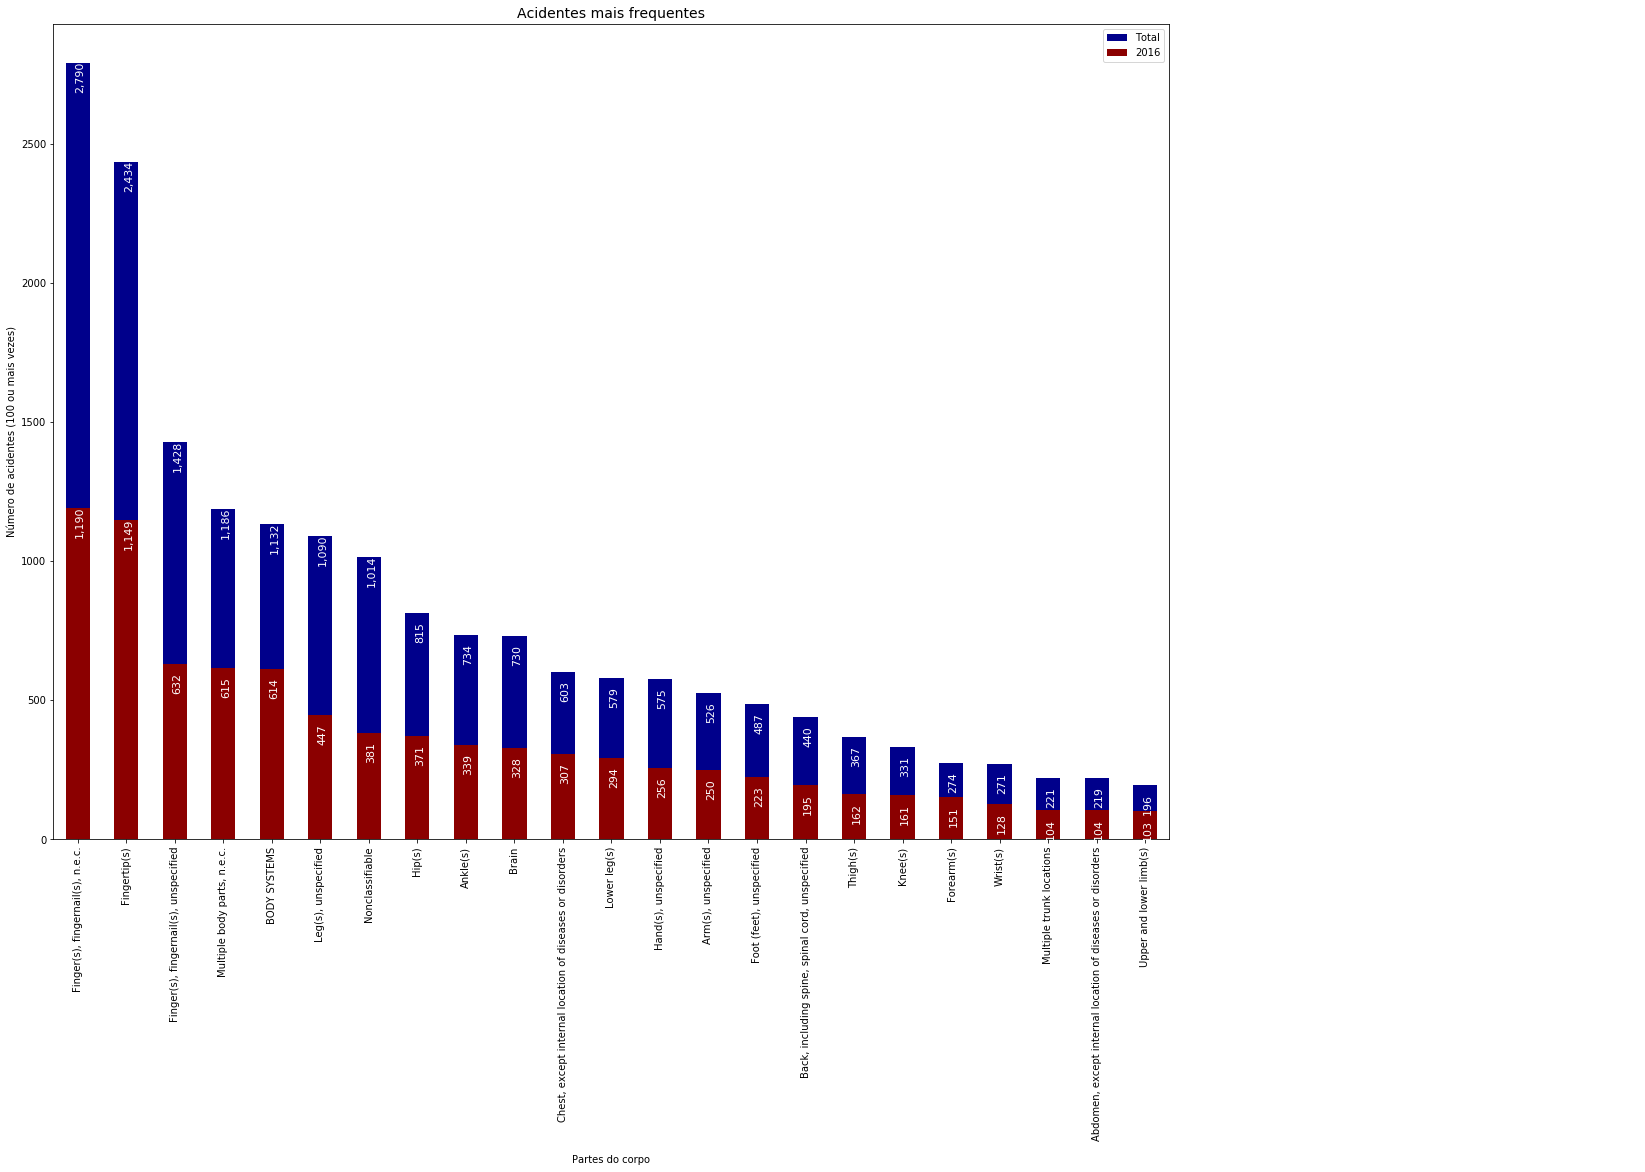

In [37]:
# Geral, sem filtro

# Partes do corpo em 2016 (com mais de 100 acidentes)
ano2016 = df1['ParteCorpo'].value_counts()[df1['ParteCorpo'].value_counts()>=100]
total = df['ParteCorpo'].value_counts()[df['ParteCorpo'].value_counts()>=100]

ax=total.plot(kind="bar", color="darkblue", figsize=(20,15), label="Total")
ax=ano2016.plot(ax=ax, kind="bar", color="darkred", label="2016")

plt.title("Acidentes mais frequentes", fontsize=14)
plt.xlabel("Partes do corpo", labelpad=14)
plt.ylabel("Número de acidentes (100 ou mais vezes)")

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()-100, \
            "{:,.0f}".format(i.get_height()), fontsize=11,
                color='white', rotation=90)

ax.legend()
                


del df1 # Garbage collection

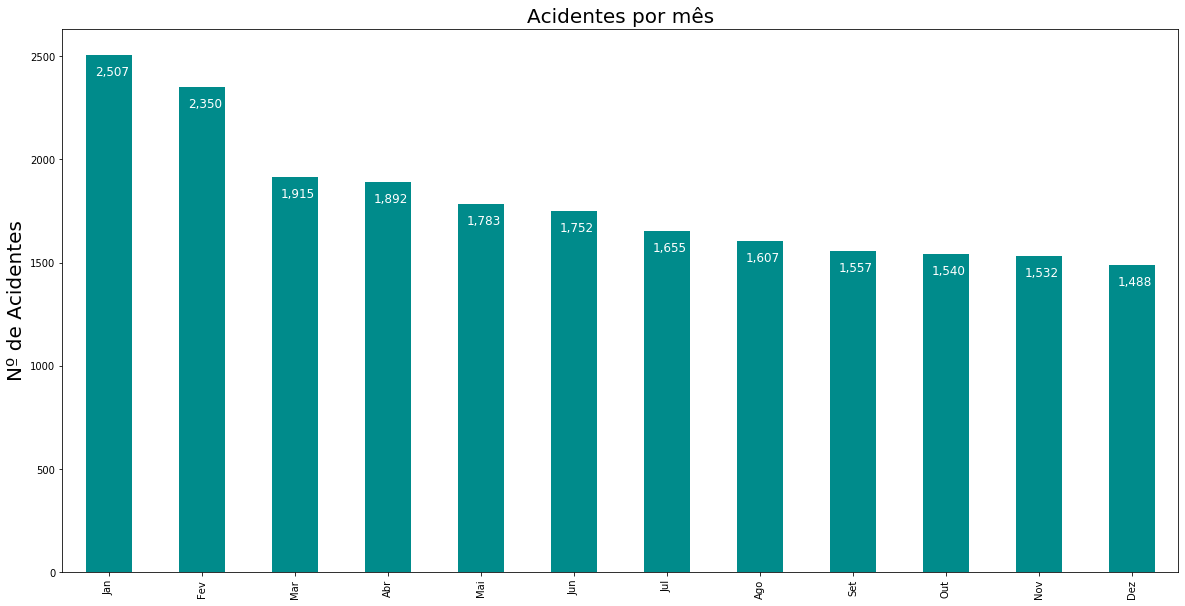

In [38]:
plt.title("Acidentes por mês", fontsize=20)
plt.ylabel("Nº de Acidentes", fontsize=20)
ax = df['mes'].value_counts().plot(kind="bar", color="darkcyan", figsize=(20,10))
labels = ["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"]
ax.set_xticklabels(labels)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.10, i.get_height()-100, \
            "{:,.0f}".format(i.get_height()), fontsize=12, 
                color='white')

Criando uma separação de eventos por trimestre para analisar a continuidade


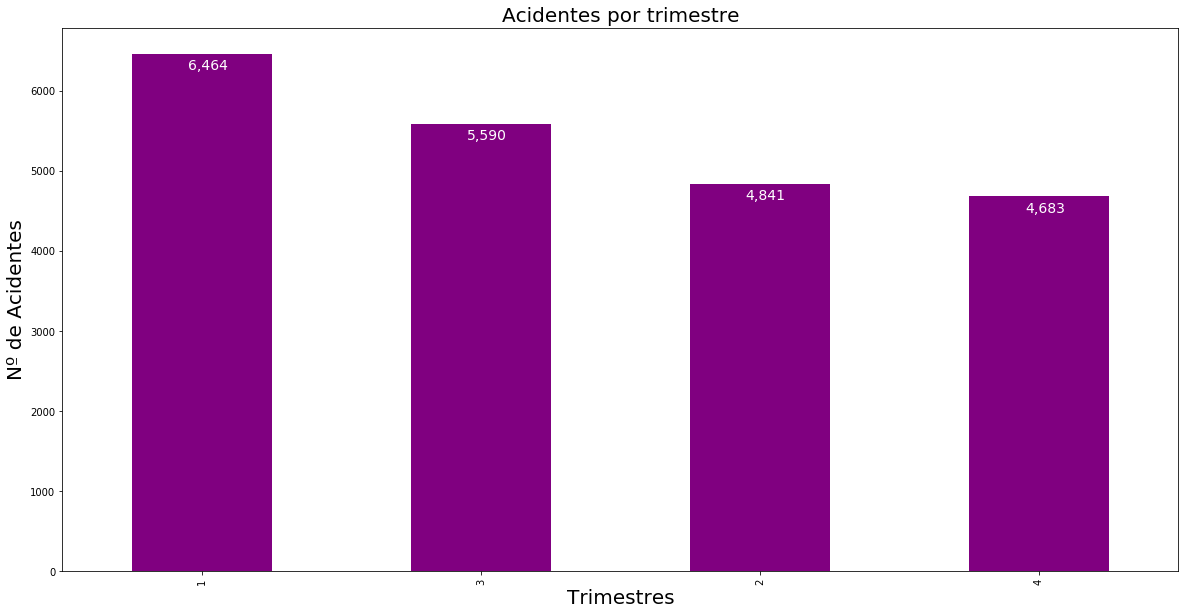

In [39]:
df["Trimestre"]=pd.DatetimeIndex(df["Data"]).quarter  
ax = df['Trimestre'].value_counts().plot(kind="bar", color="purple", figsize=(20,10))  
plt.title("Acidentes por trimestre", fontsize=20)
plt.xlabel("Trimestres", fontsize=20)
plt.ylabel("Nº de Acidentes", fontsize=20)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()-200, \
            "{:,.0f}".format(i.get_height()), fontsize=14, 
                color='white')


Conclui-se que a maioria dos acidentes acontece no primeiro trimestre do ano (Inverno nos Estados Unidos)

Explorando um pouco mais essa ideia: 
Summer: June - August
Fall: September - November
Winter: December - February
Spring: March - May 


In [40]:


df['Inverno'] = df["mes"].apply(lambda x: 1 if (x<=2 or x==12) else 0) # Definindo inverno como Jan, Fev ou Dez
df['Primavera'] = df["mes"].apply(lambda x: 1 if (x>=3 and x<=5) else 0) # Definindo primavera como Março - Maio
df['Verao'] = df["mes"].apply(lambda x: 1 if (x>=6 and x<=8) else 0) # Definindo verão como Junho - Agosto
df['Outono'] = df["mes"].apply(lambda x: 1 if (x>=9 and x<= 11) else 0) # Definindo outono como Setembro - Novembro

df.head(10)

Data       Cidade        Estado  Latitude  Longitude  Hospitalizado  \
0  1/1/2015    OTISVILLE      NEW YORK     41.46     -74.53              1   
1  1/1/2015  LAKE DELTON     WISCONSIN     43.59     -89.79              1   
2  1/1/2015   CORAOPOLIS  PENNSYLVANIA     40.49     -80.11              1   
3  1/1/2015        MACON       GEORGIA     32.77     -83.65              1   
4  1/1/2015   JANESVILLE     WISCONSIN     42.67     -89.04              1   
5  1/1/2015   CAPE CORAL       FLORIDA     26.68     -81.91              1   
6  1/1/2015        TAMPA       FLORIDA     27.96     -82.38              0   
7  1/2/2015         GILL      COLORADO     40.47    -104.51              1   
8  1/2/2015     WOODWARD      OKLAHOMA     36.42     -99.43              1   
9  1/2/2015      ORLANDO       FLORIDA     28.55     -81.46              0   

   Amputacao                                  NaturezaLesao  \
0          0                                      Fractures   
1          0             Second degree heat (thermal) burns   
2          0  Traumatic injuries and disorders, unspecified   
3          0       Soreness, pain, hurt-nonspecified injury   
4          0                                      Fractures   
5          0       Soreness, pain, hurt-nonspecified injury   
6          1                                    Amputations   
7          0              Heat (thermal) burns, unspecified   
8          0  Traumatic injuries and disorders, unspecified   
9          1                                    Amputations   

                         ParteCorpo  \
0                      Lower leg(s)   
1                    Leg(s), n.e.c.   
2                   Nonclassifiable   
3               Leg(s), unspecified   
4  Finger(s), fingernail(s), n.e.c.   
5                          Elbow(s)   
6                      Fingertip(s)   
7                   Nonclassifiable   
8                   Nonclassifiable   
9                      Fingertip(s)   

                                              Evento  \
0  Injured by physical contact with person while ...   
1              Ignition of vapors, gases, or liquids   
2         Other fall to lower level less than 6 feet   
3  Caught in or compressed by equipment or object...   
4  Caught in running equipment or machinery durin...   
5                Fall on same level due to slipping    
6  Caught in running equipment or machinery durin...   
7                                    Nonclassifiable   
8         Struck by object or equipment, unspecified   
9  Injured by slipping or swinging object held by...   

                                              Origem   ano  mes  dia  \
0                                          Co-worker  2015    1    1   
1                 Welding, cutting, and blow torches  2015    1    1   
2                Semi, tractor-trailer, tanker truck  2015    1    1   
3                                Pallet jack-powered  2015    1    1   
4  Metal, woodworking, and special material machi...  2015    1    1   
5     Floors, walkways, ground surfaces, unspecified  2015    1    1   
6             Special process machinery, unspecified  2015    1    1   
7                                    Nonclassifiable  2015    1    2   
8                                 Tires, except bike  2015    1    2   
9                      Knives, unspecified or n.e.c.  2015    1    2   

   diaSemana  Trimestre  Inverno  Primavera  Verao  Outono  
0          3          1        1          0      0       0  
1          3          1        1          0      0       0  
2          3          1        1          0      0       0  
3          3          1        1          0      0       0  
4          3          1        1          0      0       0  
5          3          1        1          0      0       0  
6          3          1        1          0      0       0  
7          4          1        1          0      0       0  
8          4          1        1          0      0       0  
9   

Comparando quantidade de acidentes por estação do ano


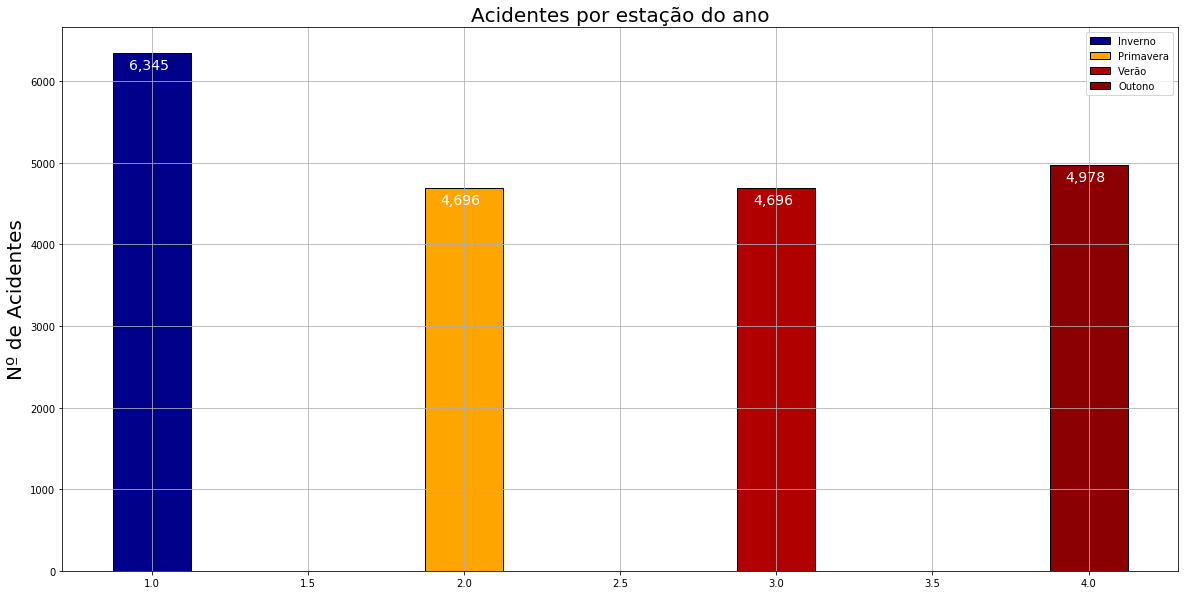

In [41]:

#pos = list(range(len(df['State']))) 
width = 0.25

fig, ax = plt.subplots(figsize=(20,10))

df_Winter = df.query("Inverno==1")
ax.bar(1, 
        df_Winter['Inverno'].value_counts(), 
        width, 
        color='darkblue', 
        edgecolor="black",
        label='Inverno')

df_Spring = df.query("Primavera==1")
ax.bar(2, 
        df_Spring['Primavera'].value_counts(), 
        width, 
        color='orange', 
        edgecolor="black",
        label='Primavera')

df_Summer = df.query("Verao==1")
ax.bar(3, 
        df_Spring['Verao'].value_counts(), 
        width, 
        color='#B10000', 
        edgecolor="black",
        label='Verão')

df_Fall = df.query("Outono==1")
ax.bar(4, 
        df_Fall['Outono'].value_counts(), 
        width, 
        color='darkred', 
        edgecolor="black",
        label='Outono')

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-200, \
            "{:,.0f}".format(i.get_height()), fontsize=14, 
                color='white')

ax.legend()

plt.title("Acidentes por estação do ano", fontsize=20)
plt.ylabel("Nº de Acidentes", fontsize=20)

plt.grid()
plt.show()

# Garbabe collection
del df_Winter
del df_Spring
del df_Summer
del df_Fall


In [42]:
# Correlação entre todas as variáveis disponíveis
df.corr().style.format("{:2}").background_gradient(cmap=plt.get_cmap("coolwarm"), axis=1)

Analisando dependência entre variáveis

In [43]:
# Quais colunas são numéricas
df[[c for c in df.columns if df[c].dtypes != "O"]]


Latitude  Longitude  Hospitalizado  Amputacao   ano  mes  dia  \
0         41.46     -74.53              1          0  2015    1    1   
1         43.59     -89.79              1          0  2015    1    1   
2         40.49     -80.11              1          0  2015    1    1   
3         32.77     -83.65              1          0  2015    1    1   
4         42.67     -89.04              1          0  2015    1    1   
...         ...        ...            ...        ...   ...  ...  ...   
21573     38.92     -76.99              1          0  2017    2   28   
21574     44.16     -88.47              1          0  2017    2   28   
21575     36.61     -93.27              1          0  2017    2   28   
21576     46.87     -96.93              1          0  2017    2   28   
21577     36.17     -94.09              1          0  2017    2   28   

       diaSemana  Trimestre  Inverno  Primavera  Verao  Outono  
0              3          1        1          0      0       0  
1              3          1        1          0      0       0  
2              3          1        1          0      0       0  
3              3          1        1          0      0       0  
4              3          1        1          0      0       0  
...          ...        ...      ...        ...    ...     ...  
21573          1          1        1          0      0       0  
21574          1          1        1          0      0       0  
21575          1          1        1          0      0       0  
21576          1          1        1          0      0       0  
21577          1          1        1          0      0       0  

[21578 rows x 13 columns]

In [44]:
# Quais colunas são categóricas
df[[c for c in df.columns if df[c].dtypes == "O"]]

Data       Cidade                Estado  \
0       1/1/2015    OTISVILLE              NEW YORK   
1       1/1/2015  LAKE DELTON             WISCONSIN   
2       1/1/2015   CORAOPOLIS          PENNSYLVANIA   
3       1/1/2015        MACON               GEORGIA   
4       1/1/2015   JANESVILLE             WISCONSIN   
...          ...          ...                   ...   
21573  2/28/2017   WASHINGTON  DISTRICT OF COLUMBIA   
21574  2/28/2017       NEENAH             WISCONSIN   
21575  2/28/2017      BRANSON              MISSOURI   
21576  2/28/2017   WEST FARGO          NORTH DAKOTA   
21577  2/28/2017   SPRINGDALE              ARKANSAS   

                                         NaturezaLesao  \
0                                            Fractures   
1                   Second degree heat (thermal) burns   
2        Traumatic injuries and disorders, unspecified   
3             Soreness, pain, hurt-nonspecified injury   
4                                            Fractures   
...                                                ...   
21573                       Fractures and dislocations   
21574                                        Fractures   
21575                                        Fractures   
21576  Poisoning, including poisoning-related asphyxia   
21577                                        Fractures   

                                  ParteCorpo  \
0                               Lower leg(s)   
1                             Leg(s), n.e.c.   
2                            Nonclassifiable   
3                        Leg(s), unspecified   
4           Finger(s), fingernail(s), n.e.c.   
...                                      ...   
21573  Finger(s), fingernail(s), unspecified   
21574            Multiple body parts, n.e.c.   
21575                           Lower leg(s)   
21576                           BODY SYSTEMS   
21577                    Leg(s), unspecified   

                                                  Evento  \
0      Injured by physical contact with person while ...   
1                  Ignition of vapors, gases, or liquids   
2             Other fall to lower level less than 6 feet   
3      Caught in or compressed by equipment or object...   
4      Caught in running equipment or machinery durin...   
...                                                  ...   
21573  Fall through surface or existing opening, unsp...   
21574             Other fall to lower level 6 to 10 feet   
21575         Other fall to lower level less than 6 feet   
21576     Inhalation of harmful substance-single episode   
21577      Struck by falling object or equipment, n.e.c.   

                                                  Origem  
0                                              Co-worker  
1                     Welding, cutting, and blow torches  
2                    Semi, tractor-trailer, tanker truck  
3                                    Pallet jack-powered  
4      Metal, woodworking, and special material machi...  
...                                                  ...  
21573                     Scaffolds-staging, unspecified  
21574                  Porches, balconies, decks, patios  
21575                              Stairs, steps-indoors  
21576                                    Carbon monoxide  
21577                                     Bundles, bales  

[21578 rows x 7 columns]

In [45]:
print("NaturezaLesao tem ",len (df["NaturezaLesao"].unique()), " valores distintos",
"\nParteCorpo tem ",len (df["ParteCorpo"].unique()), " valores distintos",
"\nEvento ",len (df["Evento"].unique()), " valores distintos"
"\nOrigem ",len (df["Origem"].unique()), " valores distintos")

NaturezaLesao tem  149  valores distintos 
ParteCorpo tem  118  valores distintos 
Evento  307  valores distintos
Origem  903  valores distintos


A maior dificuldade deste dataframe é que tem muitos dados categóricos e poucos numéricos. A ideia agora é criar dados numéricos a partir dos categóricos sem usar One Hot Encoding, o que só aumentaria a entropia

In [46]:
# Dividindo os dados em treino e teste, considerando Amputacao como Target
X_train, X_test, y_train, y_test = train_test_split(df, df["Amputacao"], test_size=0.3, random_state=0)
X_train.shape, X_test.shape


((15104, 20), (6474, 20))

In [47]:
def categorical_to_count(df_train, df_test):
    # Cópia temporária
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()

    # Criação de um dicionário para mapear
    for col in ['NaturezaLesao','ParteCorpo','Evento','Origem']:
        X_frequency_map = df_train_temp[col].value_counts().to_dict()

        # Substutir valores reais dos dados categóricos pela contagem dos dados
        df_train_temp[col] = df_train_temp[col].map(X_frequency_map)
        df_test_temp[col] = df_test_temp[col].map(X_frequency_map)

    # Retirar do dataframe do Target
    df_train_temp.drop(['Amputacao'], axis=1, inplace=True)
    df_test_temp.drop(['Amputacao'], axis=1, inplace=True) 

    return df_train_temp, df_test_temp   

# Convertendo os dados
X_train_count, X_test_count = categorical_to_count(X_train, X_test)
X_train_count.head()   

Data       Cidade      Estado  Latitude  Longitude  \
5590    7/24/2015  SPRINGFIELD    MISSOURI     37.24     -93.25   
18820  11/16/2016       AUBURN       MAINE     44.03     -70.27   
11564    3/4/2016       QUINCY    ILLINOIS     39.92     -91.41   
544     1/22/2015   PITTSVILLE   WISCONSIN     44.43     -90.12   
11612    3/6/2016     MONTAGUE  NEW JERSEY     41.29     -74.75   

       Hospitalizado  NaturezaLesao  ParteCorpo  Evento  Origem   ano  mes  \
5590               1            354         514     846     116  2015    7   
18820              0           4099        1701    1060      78  2016   11   
11564              1            696        1017      96      14  2016    3   
544                0           4099        1701     421     123  2015    1   
11612              1            354         514     349     896  2016    3   

       dia  diaSemana  Trimestre  Inverno  Primavera  Verao  Outono  
5590    24          4          3        0          0      1       0  
18820   16          2          4        0          0      0       1  
11564    4          4          1        0          1      0       0  
544     22          3          1        1          0      0       0  
11612    6          6          1        0          1      0       0

In [48]:
df_count = pd.concat([X_train_count, X_test_count])
df_count.head()

Data       Cidade      Estado  Latitude  Longitude  \
5590    7/24/2015  SPRINGFIELD    MISSOURI     37.24     -93.25   
18820  11/16/2016       AUBURN       MAINE     44.03     -70.27   
11564    3/4/2016       QUINCY    ILLINOIS     39.92     -91.41   
544     1/22/2015   PITTSVILLE   WISCONSIN     44.43     -90.12   
11612    3/6/2016     MONTAGUE  NEW JERSEY     41.29     -74.75   

       Hospitalizado  NaturezaLesao  ParteCorpo  Evento  Origem   ano  mes  \
5590               1          354.0       514.0   846.0   116.0  2015    7   
18820              0         4099.0      1701.0  1060.0    78.0  2016   11   
11564              1          696.0      1017.0    96.0    14.0  2016    3   
544                0         4099.0      1701.0   421.0   123.0  2015    1   
11612              1          354.0       514.0   349.0   896.0  2016    3   

       dia  diaSemana  Trimestre  Inverno  Primavera  Verao  Outono  
5590    24          4          3        0          0      1       0  
18820   16          2          4        0          0      0       1  
11564    4          4          1        0          1      0       0  
544     22          3          1        1          0      0       0  
11612    6          6          1        0          1      0       0

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


Nas amostras não há variáveis contínuas como idade, mas há variáveis discretas como Hospitalizado e Amputacao:




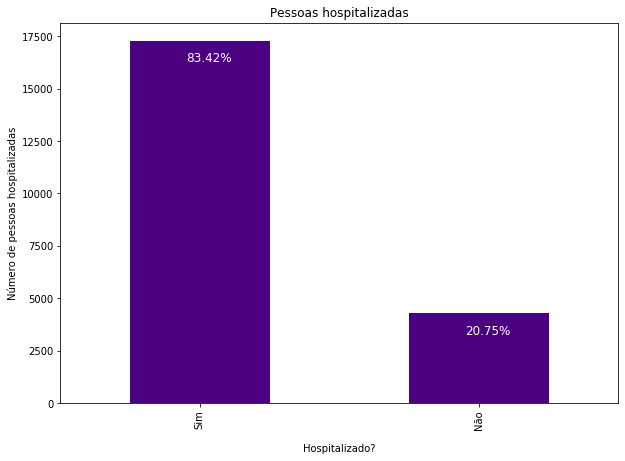

In [49]:

labels = ["Sim","Não"]

plt.title("Pessoas hospitalizadas")
plt.xlabel("Hospitalizado?", labelpad=14)
plt.ylabel("Número de pessoas hospitalizadas")

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

ax = df['Hospitalizado'].value_counts().plot(kind="bar", color="indigo", figsize=(10,7))
ax.set_xticklabels(labels)

for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()-1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='white')


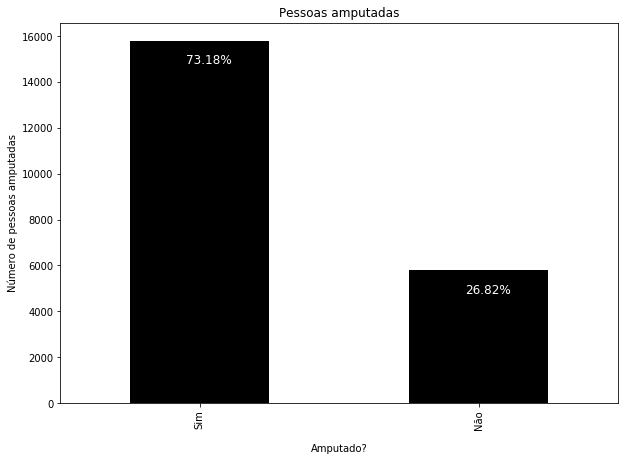

In [50]:
plt.title("Pessoas amputadas")
plt.xlabel("Amputado?", labelpad=14)
plt.ylabel("Número de pessoas amputadas")

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

ax = df['Amputacao'].value_counts().plot(kind="bar", color="black", figsize=(10,7))
ax.set_xticklabels(labels)

for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()-1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='white')

plt.show()


#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [51]:
corr = df_count["ParteCorpo"].corr(df_count["NaturezaLesao"])
print("A correlação de contagem de Partes do Corpo com a contagem de Natureza da Lesão é de ", "{0:.2f}".format(corr), "%")

A correlação de contagem de Partes do Corpo com a contagem de Natureza da Lesão é de  0.33 %


In [52]:
corr = df_count["Evento"].corr(df_count["Origem"])
print("A correlação de contagem de Eventos com a contagem de Origens é de ", "{0:.2f}".format(corr), "%")

A correlação de contagem de Eventos com a contagem de Origens é de  -0.10 %


In [53]:
corr = df_count["Trimestre"].corr(df_count["Hospitalizado"])
print("A correlação de Trimestre com Hospitalizado é de ", "{0:.2f}".format(corr), "%")

A correlação de Trimestre com Hospitalizado é de  -0.01 %


### 5) Conclusões **15%**

* A maioria dos acidentes ocorreu em regiões industrializadas dos Estados Unidos
* Os acidentes ocorreram principalmente nos dois primeiros meses do ano, que coincide com o período de Inverno nos Estados Unidos
* Os principais eventos graves foram com membros superiores
* A base de dados escolhida contém muitos dados categóricos e isso prejudicou muito a análise, embora trouxe insights interessantes
* Apesar da base de dados do Kaggle utilizada neste projeto não ser ideal, permitiu analisar a base, ainda que o uso de classificadores ficou prejudicada, cumpriu o objetivo de enálise de exploratória dos dados.
